# Student Performance vs Funding

#### Data sources: https://www.kaggle.com/noriuk/us-educational-finances?select=states.csv

### Import Dependencies and Setup for the analyze

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns

# Study data files paths
average_scores_path = "Input_Data/naep.csv"
fed_revenue_path = "Input_Data/states.csv"

# Read the score data and the revenue results
scores_data = pd.read_csv(average_scores_path)
revenue_data = pd.read_csv(fed_revenue_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(scores_data, revenue_data, how='inner', \
                          left_on=['STATE','YEAR'], right_on=['STATE', 'YEAR'])

# Display the data table for preview
merged_data_df

# output file (csv)
output_data_file = "clean_math_8.csv"
output_data_file = "clean_reading_8.csv"
output_data_file = "clean_math_4.csv"
output_data_file = "clean_reading_4.csv"

In [2]:
# Group merged data by the test subject
test_subject = merged_data_df.groupby(['TEST_SUBJECT'])
test_subject.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,2015,Alabama,230.9774227,Mathematics,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
1,2015,Alabama,266.5553185,Mathematics,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
2,2015,Alabama,217.0490898,Reading,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
3,2015,Alabama,258.7537615,Reading,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
5,2015,Alaska,280.4934562,Mathematics,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
6,2015,Alaska,212.7926002,Reading,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
7,2015,Alaska,260.3170188,Reading,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
8,2015,Arizona,237.6117554,Mathematics,4,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662
10,2015,Arizona,215.3113365,Reading,4,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662


### Reveune and Spending analysis

In [3]:
# Total Reveune and Spending
year_2015 = merged_data_df[(merged_data_df['YEAR'] == 2015)]
year_2015["AVG_SCORE"] = year_2015["AVG_SCORE"].astype(float)
# year_2015.head()

year_2015 = year_2015.drop(columns=['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 
                              'TOTAL_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',
                             'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE'])
year_2015.head()

C:\Users\trang\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610


In [4]:
# Statistics for total revenue
total_rev = year_2015['TOTAL_REVENUE'].agg(['mean', 'median', 'var', 'std', 'sem'])
total_rev

mean      1.281705e+07
median    7.548871e+06
var       2.436156e+14
std       1.560819e+07
sem       1.092792e+06
Name: TOTAL_REVENUE, dtype: float64

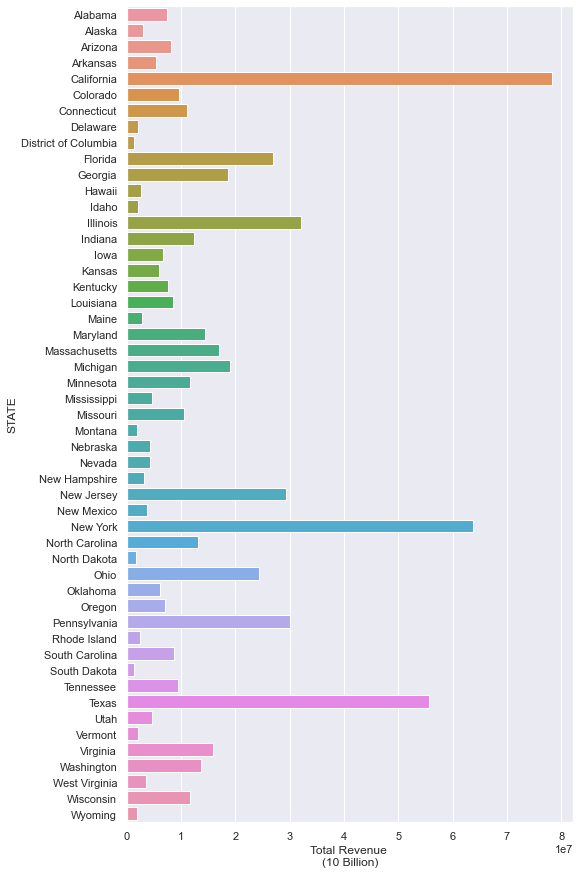

In [5]:
# Total revenue in each State in 2015, presenting in barplot
# Note: The total revenue is the same regardless the grade or subject

sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize=(8, 15))
              
sns.barplot(x ='TOTAL_REVENUE', y ='STATE', data = year_2015)
ax.set(xlabel = "Total Revenue \n(10 Billion)")

plt.savefig("Total Revenue by State.png")

In [6]:
# Calculate the Instructional spending per Student for 2015
# Note: The instructional expenditure is the same regardless the grade or subject

spending_per_student = round((year_2015['INSTRUCTION_EXPENDITURE']*1000)/year_2015['ENROLL'],2)
# spending_per_student.head()

year_2015['Instructional spending per Student'] = spending_per_student
year_2015.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,Instructional spending per Student
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479,5194.03
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479,5194.03
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479,5194.03
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479,5194.03
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610,11354.14


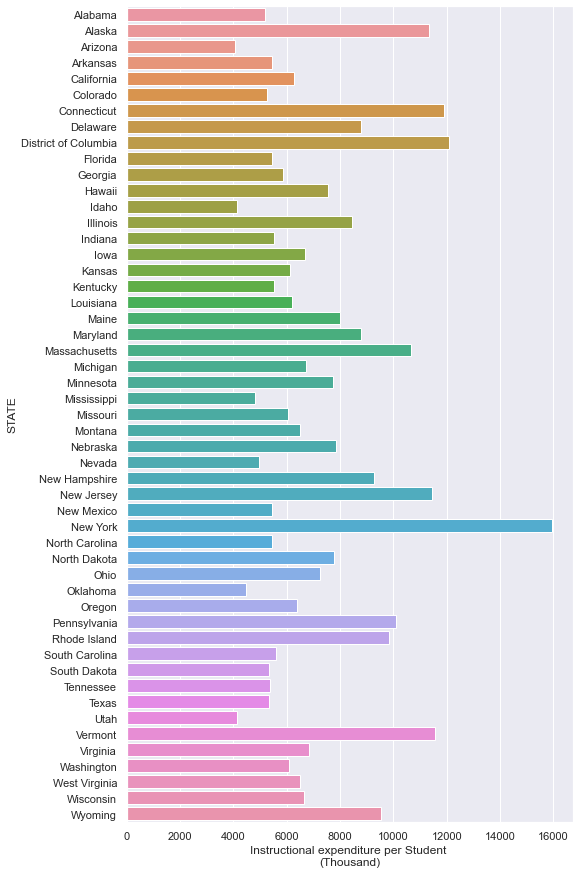

In [7]:
# Instructional expenditure in each State in 2015, presenting in barplot

sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize=(8, 15))
              
sns.barplot(x ='Instructional spending per Student', y ='STATE', data = year_2015)
ax.set(xlabel = "Instructional expenditure per Student \n(Thousand)")

plt.savefig("Instructional spending per student by State.png")

#### Get the following dataframes:
* 2015 4th grade Math
* 2015 8th grade Math
* 2015 4th grade Reading
* 2015 8th grade Reading

In [8]:
# For 2015 4th grade Math data

math = year_2015[year_2015['TEST_SUBJECT'] == 'Mathematics']

grade_4_math = math[math['TEST_YEAR'] == 4]

# Covert the type of the Average scores
grade_4_math["AVG_SCORE"] = grade_4_math["AVG_SCORE"].astype(float)
grade_4_math.head()

C:\Users\trang\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,Instructional spending per Student
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479,5194.03
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610,11354.14
8,2015,Arizona,237.611755,Mathematics,4,944978.0,8230507,3846357,4070.31
12,2015,Arkansas,235.215470,Mathematics,4,479682.0,5308625,2620399,5462.78
16,2015,California,231.549345,Mathematics,4,6226523.0,78248042,38951948,6255.81


In [9]:
# For 2015 8th grade Math data

math = year_2015[year_2015['TEST_SUBJECT'] == 'Mathematics']

grade_8_math = math[math['TEST_YEAR'] == 8]

# Covert the type of the Average scores
grade_8_math["AVG_SCORE"] = grade_8_math["AVG_SCORE"].astype(float)
grade_8_math.head()

C:\Users\trang\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,Instructional spending per Student
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479,5194.03
5,2015,Alaska,280.493456,Mathematics,8,130755.0,2920986,1484610,11354.14
9,2015,Arizona,282.919489,Mathematics,8,944978.0,8230507,3846357,4070.31
13,2015,Arkansas,275.064756,Mathematics,8,479682.0,5308625,2620399,5462.78
17,2015,California,275.324573,Mathematics,8,6226523.0,78248042,38951948,6255.81


In [10]:
# For 2015 4th grade Reading data

reading = year_2015[year_2015['TEST_SUBJECT'] == 'Reading']
# Math
grade_4_reading = reading[reading['TEST_YEAR'] == 4]

grade_4_reading["AVG_SCORE"] = grade_4_reading["AVG_SCORE"].astype(float)
grade_4_reading.head()

C:\Users\trang\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,Instructional spending per Student
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479,5194.03
6,2015,Alaska,212.792600,Reading,4,130755.0,2920986,1484610,11354.14
10,2015,Arizona,215.311337,Reading,4,944978.0,8230507,3846357,4070.31
14,2015,Arkansas,218.077496,Reading,4,479682.0,5308625,2620399,5462.78
18,2015,California,212.677949,Reading,4,6226523.0,78248042,38951948,6255.81


In [11]:
# For 2015 8th grade Reading data

reading = year_2015[year_2015['TEST_SUBJECT'] == 'Reading']
# Math
grade_8_reading = reading[reading['TEST_YEAR'] == 8]

grade_8_reading["AVG_SCORE"] = grade_8_reading["AVG_SCORE"].astype(float)
grade_8_reading.head()

C:\Users\trang\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,Instructional spending per Student
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479,5194.03
7,2015,Alaska,260.317019,Reading,8,130755.0,2920986,1484610,11354.14
11,2015,Arizona,262.769392,Reading,8,944978.0,8230507,3846357,4070.31
15,2015,Arkansas,258.768268,Reading,8,479682.0,5308625,2620399,5462.78
19,2015,California,258.986843,Reading,8,6226523.0,78248042,38951948,6255.81


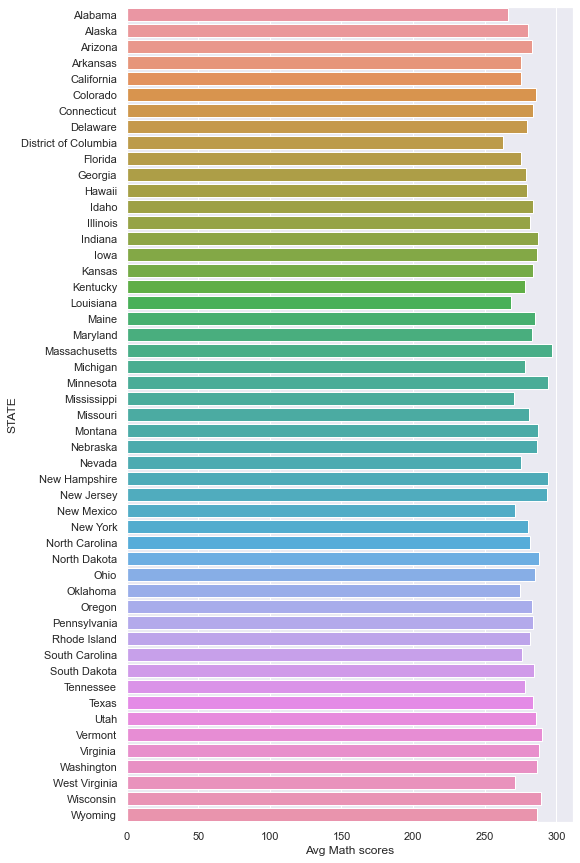

In [12]:
# Barplot to show the Avg math scores in each State in 2015
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize=(8, 15))
              
sns.barplot(x ='AVG_SCORE', y ='STATE', data = grade_8_math)
ax.set(xlabel = "Avg Math scores")

plt.savefig("Average Math Scores by State.png")

### Total revenue vs scores

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='AVG_SCORE'>

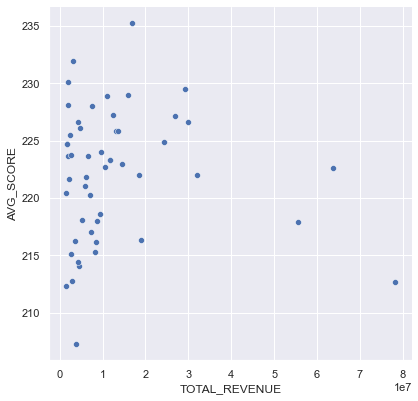

In [13]:
# Total Revenue vs 4th grade Reading scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (6.5, 6.5))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "TOTAL_REVENUE", y = "AVG_SCORE",
                sizes = (1, 8), data = grade_4_reading, ax = ax)

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='AVG_SCORE'>

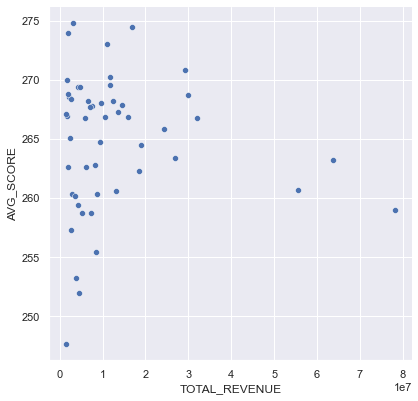

In [14]:
# Total Revenue vs 8th grade Reading scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (6.5, 6.5))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "TOTAL_REVENUE", y = "AVG_SCORE",
                sizes = (1, 8), data = grade_8_reading, ax = ax)

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='AVG_SCORE'>

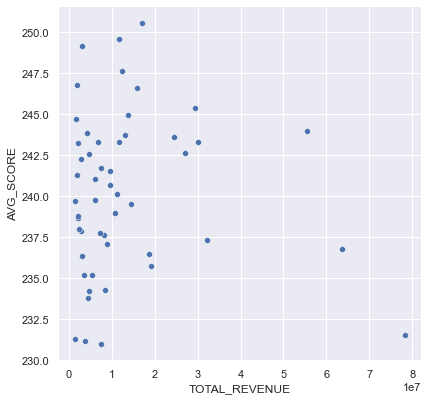

In [15]:
# Total Revenue vs 4th grade Math scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (6.5, 6.5))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "TOTAL_REVENUE", y = "AVG_SCORE",
                sizes = (1, 8), data = grade_4_math, ax = ax)

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='AVG_SCORE'>

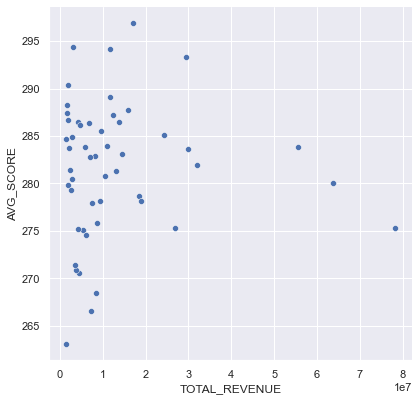

In [16]:
# Total Revenue vs 8th grade Math scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (6.5, 6.5))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "TOTAL_REVENUE", y = "AVG_SCORE",
                sizes = (1, 8), data = grade_8_math, ax = ax)

<AxesSubplot:xlabel='Instructional spending per Student', ylabel='AVG_SCORE'>

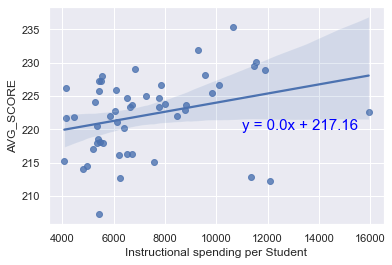

In [17]:
# Linear regression for 4th grade Reading vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_4_reading["Instructional spending per Student"],\
                                                               grade_4_reading["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (11000, 220), fontsize = 15, color = 'blue')

sns.regplot(data = grade_4_reading, x = "Instructional spending per Student", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

<AxesSubplot:xlabel='Instructional spending per Student', ylabel='AVG_SCORE'>

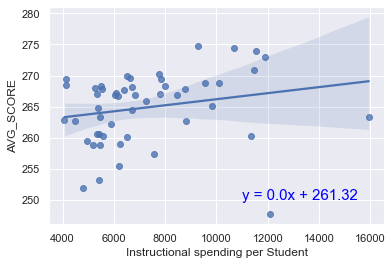

In [18]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_8_reading["Instructional spending per Student"],\
                                                               grade_8_reading["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (11000, 250), fontsize = 15, color = 'blue')

sns.regplot(data = grade_8_reading, x = "Instructional spending per Student", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

<AxesSubplot:xlabel='Instructional spending per Student', ylabel='AVG_SCORE'>

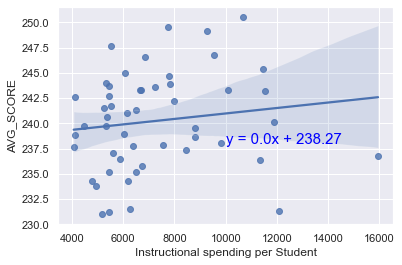

In [19]:
# Linear regression for 4th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_4_math["Instructional spending per Student"],\
                                                               grade_4_math["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (10000, 238), fontsize = 15, color = 'blue')

sns.regplot(data = grade_4_math, x = "Instructional spending per Student", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

<AxesSubplot:xlabel='Instructional spending per Student', ylabel='AVG_SCORE'>

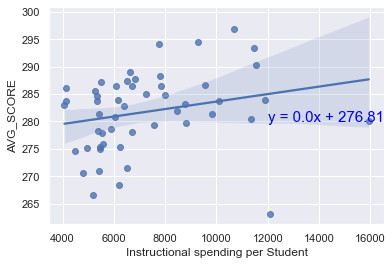

In [20]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_8_math["Instructional spending per Student"],\
                                                               grade_8_math["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (12000, 280), fontsize = 15, color = 'blue')

sns.regplot(data = grade_8_math, x = "Instructional spending per Student", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

In [21]:
grade_8_math.to_csv('clean_math_8.csv', index=False, header=True)
grade_8_reading.to_csv('clean_reading_8.csv', index=False, header=True)
grade_4_math.to_csv('clean_math_4.csv', index=False, header=True)
grade_4_reading.to_csv('clean_reading_4.csv', index=False, header=True)

Our Null hypothesis is that there is no relationship between Instructional spending per Students and performances on Math and Reading Test. 

In [22]:
#Performing Ttest
st.ttest_ind(grade_8_math["Instructional spending per Student"],grade_8_math["AVG_SCORE"], equal_var=False)

Ttest_indResult(statistic=19.776815447570744, pvalue=2.7251386657249737e-25)

# All years

In [23]:
merged_data_df

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,2015,Alabama,230.9774227,Mathematics,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
1,2015,Alabama,266.5553185,Mathematics,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
2,2015,Alabama,217.0490898,Reading,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
3,2015,Alabama,258.7537615,Reading,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,1994,Virginia,213.4572859,Reading,4,1044721.0,6125739,372866,2399644,3353229,6276362,3271356,1883438,314439.0,587495
2036,1994,Washington,212.6953858,Reading,4,915952.0,5739012,327784,3978265,1432963,5968590,2918426,1741684,252127.0,840257
2037,1994,West Virginia,213.1469347,Reading,4,313750.0,1854403,147289,1185501,521613,1843973,1051169,507996,116579.0,151404
2038,1994,Wisconsin,224.1745453,Reading,4,843747.0,5682439,238786,2363863,3079790,5860230,3257526,1689034,193556.0,504767


In [24]:
#convert  to numeric
merged_data_df['AVG_SCORE'] = merged_data_df['AVG_SCORE'].apply(pd.to_numeric, errors='coerce' )
merged_data_df['TOTAL_REVENUE'] = merged_data_df['TOTAL_REVENUE'].apply(pd.to_numeric, errors='coerce' )
merged_data_df['INSTRUCTION_EXPENDITURE'] = merged_data_df['INSTRUCTION_EXPENDITURE'].apply(pd.to_numeric, errors='coerce' )
merged_data_df



,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,1994,Virginia,213.457286,Reading,4,1044721.0,6125739,372866,2399644,3353229,6276362,3271356,1883438,314439.0,587495
2036,1994,Washington,212.695386,Reading,4,915952.0,5739012,327784,3978265,1432963,5968590,2918426,1741684,252127.0,840257
2037,1994,West Virginia,213.146935,Reading,4,313750.0,1854403,147289,1185501,521613,1843973,1051169,507996,116579.0,151404
2038,1994,Wisconsin,224.174545,Reading,4,843747.0,5682439,238786,2363863,3079790,5860230,3257526,1689034,193556.0,504767


In [25]:
clean_data = merged_data_df.dropna()
clean_data

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,1994,Virginia,213.457286,Reading,4,1044721.0,6125739,372866,2399644,3353229,6276362,3271356,1883438,314439.0,587495
2036,1994,Washington,212.695386,Reading,4,915952.0,5739012,327784,3978265,1432963,5968590,2918426,1741684,252127.0,840257
2037,1994,West Virginia,213.146935,Reading,4,313750.0,1854403,147289,1185501,521613,1843973,1051169,507996,116579.0,151404
2038,1994,Wisconsin,224.174545,Reading,4,843747.0,5682439,238786,2363863,3079790,5860230,3257526,1689034,193556.0,504767


In [26]:
clean_data['INSTRUCTION_EXPENDITURE_PER_STD'] = merged_data_df['INSTRUCTION_EXPENDITURE'] * 1000 / merged_data_df['ENROLL']
clean_data

C:\Users\trang\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,INSTRUCTION_EXPENDITURE_PER_STD
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091,5194.032714
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091,5194.032714
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091,5194.032714
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091,5194.032714
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914,11354.135597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,1994,Virginia,213.457286,Reading,4,1044721.0,6125739,372866,2399644,3353229,6276362,3271356,1883438,314439.0,587495,3131.320228
2036,1994,Washington,212.695386,Reading,4,915952.0,5739012,327784,3978265,1432963,5968590,2918426,1741684,252127.0,840257,3186.221549
2037,1994,West Virginia,213.146935,Reading,4,313750.0,1854403,147289,1185501,521613,1843973,1051169,507996,116579.0,151404,3350.339442
2038,1994,Wisconsin,224.174545,Reading,4,843747.0,5682439,238786,2363863,3079790,5860230,3257526,1689034,193556.0,504767,3860.785283


In [27]:
Massachusetts_8_Math = clean_data.loc[(clean_data['STATE'] == 'Massachusetts') & (clean_data['TEST_SUBJECT'] == 'Mathematics')  & (clean_data['TEST_YEAR'] == 8)]
Massachusetts_8_Math

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,INSTRUCTION_EXPENDITURE_PER_STD
85,2015,Massachusetts,296.908571,Mathematics,8,916130.0,16985185,778939,6808436,9397810,16972319,9774884,5043032,497880.0,1034539,10669.756476
289,2013,Massachusetts,300.568235,Mathematics,8,920968.0,16114783,818054,6428534,8868195,16201905,9097982,4759997,467050.0,1283156,9878.716742
493,2011,Massachusetts,298.512431,Mathematics,8,924903.0,15396681,1197383,5783240,8416058,15150898,8685894,4583586,445972.0,817228,9391.140476
697,2009,Massachusetts,298.854347,Mathematics,8,932437.0,15298022,1181681,5974489,8141852,15174814,8885949,4626112,456737.0,589413,9529.811666
901,2007,Massachusetts,297.923344,Mathematics,8,945070.0,14407777,754202,6485380,7168195,14315518,8053653,4248353,422102.0,951016,8521.752886
1105,2005,Massachusetts,291.513541,Mathematics,8,955225.0,12976279,761359,5434971,6779949,12726283,7203922,3750687,391078.0,803602,7541.597006
1309,2003,Massachusetts,286.520694,Mathematics,8,967200.0,11591832,712487,4757632,6121713,11382398,6521028,3444135,356389.0,424368,6742.171216
1471,2000,Massachusetts,283.123246,Mathematics,8,958907.0,9464271,480898,3926522,5056851,9466363,5624037,2503616,323913.0,533702,5865.049478
1573,1996,Massachusetts,277.565642,Mathematics,8,912330.0,7129757,302167,3028094,3799496,7479576,4171772,1953199,221882.0,360126,4572.656824


In [28]:
#Performing Ttest
st.ttest_ind(Massachusetts_8_Math["INSTRUCTION_EXPENDITURE_PER_STD"],Massachusetts_8_Math["AVG_SCORE"], equal_var=False)

Ttest_indResult(statistic=11.459215835854456, pvalue=3.0433885308477564e-06)

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE_PER_STD', ylabel='AVG_SCORE'>

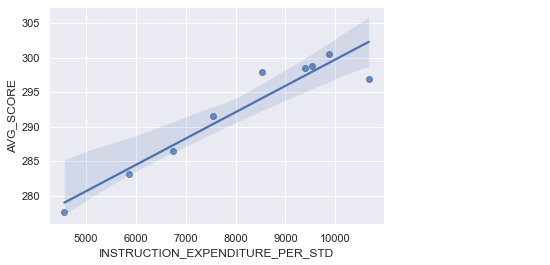

In [29]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(Massachusetts_8_Math["INSTRUCTION_EXPENDITURE_PER_STD"],\
                                                               Massachusetts_8_Math["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (12000, 280), fontsize = 15, color = 'blue')

sns.regplot(data = Massachusetts_8_Math, x = "INSTRUCTION_EXPENDITURE_PER_STD", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

In [30]:
#Performing Ttest
st.ttest_ind(Massachusetts_8_Math["TOTAL_REVENUE"],Massachusetts_8_Math["AVG_SCORE"], equal_var=False)

Ttest_indResult(statistic=12.07105868057985, pvalue=2.049519194280855e-06)

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='AVG_SCORE'>

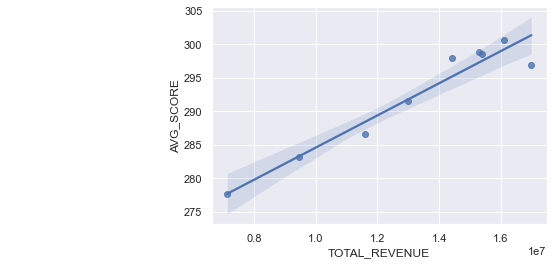

In [31]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(Massachusetts_8_Math["TOTAL_REVENUE"],\
                                                               Massachusetts_8_Math["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (12000, 280), fontsize = 15, color = 'blue')

sns.regplot(data = Massachusetts_8_Math, x = "TOTAL_REVENUE", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

In [32]:
Massachusetts_8_Reading = clean_data.loc[(clean_data['STATE'] == 'Massachusetts') & (clean_data['TEST_SUBJECT'] == 'Reading')  & (clean_data['TEST_YEAR'] == 8)]
Massachusetts_8_Reading

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,INSTRUCTION_EXPENDITURE_PER_STD
87,2015,Massachusetts,274.497568,Reading,8,916130.0,16985185,778939,6808436,9397810,16972319,9774884,5043032,497880.0,1034539,10669.756476
291,2013,Massachusetts,277.009559,Reading,8,920968.0,16114783,818054,6428534,8868195,16201905,9097982,4759997,467050.0,1283156,9878.716742
495,2011,Massachusetts,275.368518,Reading,8,924903.0,15396681,1197383,5783240,8416058,15150898,8685894,4583586,445972.0,817228,9391.140476
699,2009,Massachusetts,273.589290,Reading,8,932437.0,15298022,1181681,5974489,8141852,15174814,8885949,4626112,456737.0,589413,9529.811666
903,2007,Massachusetts,273.284049,Reading,8,945070.0,14407777,754202,6485380,7168195,14315518,8053653,4248353,422102.0,951016,8521.752886
1107,2005,Massachusetts,273.716063,Reading,8,955225.0,12976279,761359,5434971,6779949,12726283,7203922,3750687,391078.0,803602,7541.597006
1311,2003,Massachusetts,272.906645,Reading,8,967200.0,11591832,712487,4757632,6121713,11382398,6521028,3444135,356389.0,424368,6742.171216
1828,2002,Massachusetts,270.518267,Reading,8,959641.0,11217085,600037,4681737,5935311,11507438,6256148,3256542,351743.0,1154305,6519.258764
1930,1998,Massachusetts,268.872458,Reading,8,942331.0,7726497,366880,3183950,4175667,8098720,4849603,2173146,255100.0,469395,5146.390175


In [33]:
#Performing Ttest
st.ttest_ind(Massachusetts_8_Reading["INSTRUCTION_EXPENDITURE_PER_STD"],Massachusetts_8_Reading["AVG_SCORE"], equal_var=False)

Ttest_indResult(statistic=12.99031538268332, pvalue=1.1689652686866326e-06)

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE_PER_STD', ylabel='AVG_SCORE'>

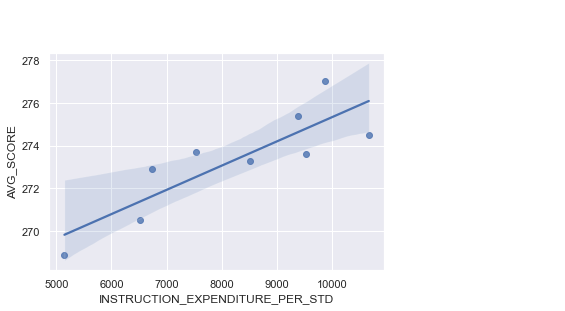

In [34]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(Massachusetts_8_Reading["INSTRUCTION_EXPENDITURE_PER_STD"],\
                                                               Massachusetts_8_Reading["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (12000, 280), fontsize = 15, color = 'blue')

sns.regplot(data = Massachusetts_8_Reading, x = "INSTRUCTION_EXPENDITURE_PER_STD", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='AVG_SCORE'>

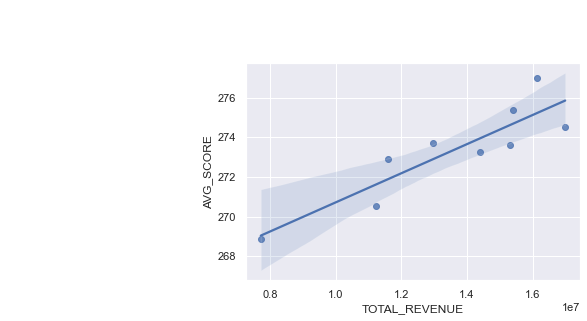

In [35]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(Massachusetts_8_Reading["TOTAL_REVENUE"],\
                                                               Massachusetts_8_Reading["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (12000, 280), fontsize = 15, color = 'blue')

sns.regplot(data = Massachusetts_8_Reading, x = "TOTAL_REVENUE", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

In [36]:
Georgia_8_Math = clean_data.loc[(clean_data['STATE'] == 'Georgia') & (clean_data['TEST_SUBJECT'] == 'Mathematics')  & (clean_data['TEST_YEAR'] == 8)]
Georgia_8_Math

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,INSTRUCTION_EXPENDITURE_PER_STD
41,2015,Georgia,278.711797,Mathematics,8,1717805.0,18584666,1831221,8310872,8442573,18501103,10081483,5324072,996277.0,1879063,5868.816891
245,2013,Georgia,279.179111,Mathematics,8,1682620.0,17459504,1805878,7580785,8072841,17317504,9555687,4956142,932291.0,1632844,5679.052311
449,2011,Georgia,278.483619,Mathematics,8,1666039.0,18030043,2267161,7492489,8270393,17187481,9671343,5005101,874605.0,1368395,5804.991960
653,2009,Georgia,277.561200,Mathematics,8,1649598.0,17972839,1644548,7739086,8589205,19025136,10063924,5135180,837062.0,2712073,6100.834264
857,2007,Georgia,274.778665,Mathematics,8,1628409.0,17755989,1475463,7907177,8373349,17389530,9507096,4672304,757339.0,2271958,5838.272817
1061,2005,Georgia,272.191564,Mathematics,8,1552758.0,14724731,1375318,6449103,6900310,14492666,7886069,3954215,658022.0,1794894,5078.749554
1265,2003,Georgia,269.677009,Mathematics,8,1495819.0,13524807,1051973,6551699,5921135,13516783,7352918,3615906,649880.0,1705482,4915.646880
1449,2000,Georgia,266.332047,Mathematics,8,1422941.0,11197766,710741,5406709,5080316,10884510,5701293,2931538,546396.0,1520834,4006.696694
1551,1996,Georgia,262.466021,Mathematics,8,1311126.0,7764687,516518,4086584,3161585,7934236,4118122,2125775,509934.0,1042930,3140.904841


In [37]:
#Performing Ttest
st.ttest_ind(Georgia_8_Math["INSTRUCTION_EXPENDITURE_PER_STD"],Georgia_8_Math["AVG_SCORE"], equal_var=False)

Ttest_indResult(statistic=14.652220373988383, pvalue=4.6180578865492476e-07)

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE_PER_STD', ylabel='AVG_SCORE'>

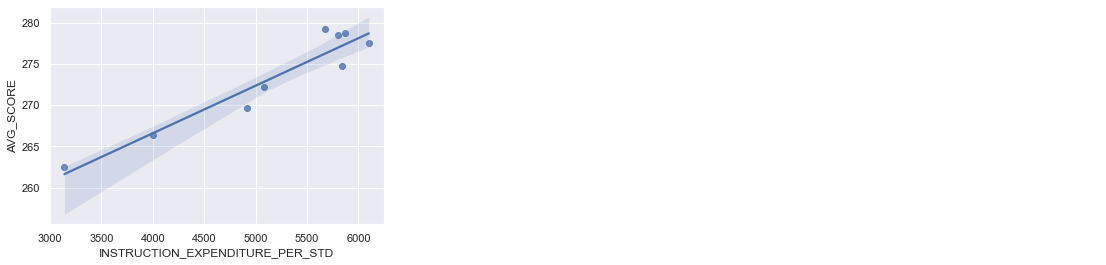

In [38]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(Georgia_8_Math["INSTRUCTION_EXPENDITURE_PER_STD"],\
                                                               Georgia_8_Math["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (12000, 280), fontsize = 15, color = 'blue')

sns.regplot(data = Georgia_8_Math, x = "INSTRUCTION_EXPENDITURE_PER_STD", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

In [39]:
DC_8_Math = clean_data.loc[(clean_data['STATE'] == 'District of Columbia') & (clean_data['TEST_SUBJECT'] == 'Mathematics')  & (clean_data['TEST_YEAR'] == 8)]
DC_8_Math

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,INSTRUCTION_EXPENDITURE_PER_STD
33,2015,District of Columbia,263.059776,Mathematics,8,46155.0,1382282,146366,0,1235916,1360942,557345,379854,41841.0,381902,12075.506446
237,2013,District of Columbia,265.259366,Mathematics,8,44179.0,1300036,129874,0,1170162,1308438,559940,332997,39825.0,375676,12674.347541
441,2011,District of Columbia,260.466878,Mathematics,8,44199.0,1283071,155505,0,1127566,1297175,525185,389526,56132.0,326332,11882.282405
645,2009,District of Columbia,253.595187,Mathematics,8,44331.0,801008,75856,0,725152,805362,330698,370127,38514.0,66023,7459.746002
849,2007,District of Columbia,248.198742,Mathematics,8,56943.0,1148358,134700,0,1013658,1140506,491992,437772,40703.0,167103,8640.078675
1053,2005,District of Columbia,245.215781,Mathematics,8,62306.0,1109605,167922,0,941683,1085658,459063,450060,38671.0,134417,7367.877893
1257,2003,District of Columbia,243.059638,Mathematics,8,67522.0,1114061,152599,0,961462,1105963,473414,406078,32193.0,194278,7011.255591
1445,2000,District of Columbia,234.428798,Mathematics,8,70762.0,881423,184825,0,696598,858807,318260,429891,23107.0,87549,4497.611713
1547,1996,District of Columbia,232.831510,Mathematics,8,79802.0,678874,57870,0,621004,703245,334893,312944,39956.0,15452,4196.548959


In [40]:
DC_8_Math = DC_8_Math.loc[DC_8_Math['YEAR'] != 2009]
DC_8_Math

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,INSTRUCTION_EXPENDITURE_PER_STD
33,2015,District of Columbia,263.059776,Mathematics,8,46155.0,1382282,146366,0,1235916,1360942,557345,379854,41841.0,381902,12075.506446
237,2013,District of Columbia,265.259366,Mathematics,8,44179.0,1300036,129874,0,1170162,1308438,559940,332997,39825.0,375676,12674.347541
441,2011,District of Columbia,260.466878,Mathematics,8,44199.0,1283071,155505,0,1127566,1297175,525185,389526,56132.0,326332,11882.282405
849,2007,District of Columbia,248.198742,Mathematics,8,56943.0,1148358,134700,0,1013658,1140506,491992,437772,40703.0,167103,8640.078675
1053,2005,District of Columbia,245.215781,Mathematics,8,62306.0,1109605,167922,0,941683,1085658,459063,450060,38671.0,134417,7367.877893
1257,2003,District of Columbia,243.059638,Mathematics,8,67522.0,1114061,152599,0,961462,1105963,473414,406078,32193.0,194278,7011.255591
1445,2000,District of Columbia,234.428798,Mathematics,8,70762.0,881423,184825,0,696598,858807,318260,429891,23107.0,87549,4497.611713
1547,1996,District of Columbia,232.831510,Mathematics,8,79802.0,678874,57870,0,621004,703245,334893,312944,39956.0,15452,4196.548959


In [41]:
#Performing Ttest
st.ttest_ind(DC_8_Math["INSTRUCTION_EXPENDITURE_PER_STD"],DC_8_Math["AVG_SCORE"], equal_var=False)

Ttest_indResult(statistic=6.952761305816337, pvalue=0.00022062006309123526)

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE_PER_STD', ylabel='AVG_SCORE'>

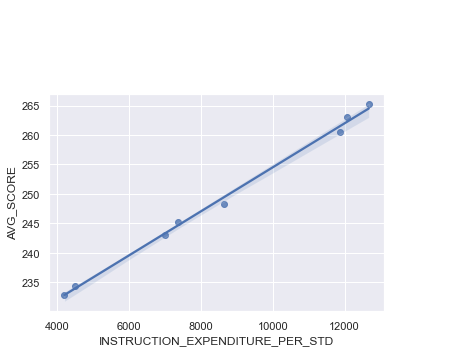

In [42]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(DC_8_Math["INSTRUCTION_EXPENDITURE_PER_STD"],\
                                                               DC_8_Math["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (12000, 280), fontsize = 15, color = 'blue')

sns.regplot(data = DC_8_Math, x = "INSTRUCTION_EXPENDITURE_PER_STD", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

In [46]:
clean_data = clean_data.loc[(clean_data['TEST_SUBJECT'] == 'Mathematics') & (clean_data['TEST_YEAR'] == 8)]
clean_data

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,INSTRUCTION_EXPENDITURE_PER_STD
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,795238,4080167,2484817,7501799,3817479,2414860,594283.0,510091,5194.032714
5,2015,Alaska,280.493456,Mathematics,8,130755.0,2920986,344111,2026555,550320,2968341,1484610,1068849,92766.0,281914,11354.135597
9,2015,Arizona,282.919489,Mathematics,8,944978.0,8230507,1093834,3232013,3904660,7902600,3846357,2880184,478876.0,497662,4070.313806
13,2015,Arkansas,275.064756,Mathematics,8,479682.0,5308625,581412,4075118,652095,5350543,2620399,1772639,290396.0,511556,5462.783678
17,2015,California,275.324573,Mathematics,8,6226523.0,78248042,7556365,42360470,28331207,78365958,38951948,23501848,3754315.0,6373893,6255.810506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1996,Virginia,269.754405,Mathematics,8,1079854.0,6674519,361726,2548036,3764757,6903384,3601237,2045400,347988.0,721139,3334.929537
1625,1996,Washington,276.117120,Mathematics,8,956572.0,6354593,366716,4288899,1698978,6578388,3222598,1927517,280214.0,895494,3368.902707
1627,1996,West Virginia,264.865205,Mathematics,8,306451.0,1958647,158572,1222505,577570,1936848,1131846,556873,130467.0,101350,3693.399597
1629,1996,Wisconsin,282.848742,Mathematics,8,869930.0,6342623,270455,2869875,3202293,6521058,3567663,1872074,212389.0,617334,4101.092042


In [47]:

st.ttest_ind(clean_data["INSTRUCTION_EXPENDITURE_PER_STD"],clean_data["AVG_SCORE"], equal_var=False)

Ttest_indResult(statistic=54.73107737038968, pvalue=1.0488877592112708e-197)

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE_PER_STD', ylabel='AVG_SCORE'>

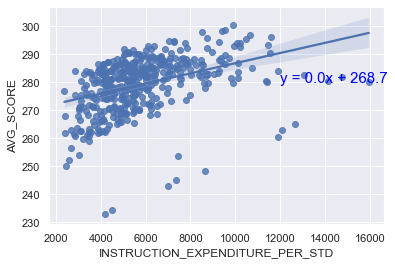

In [48]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)

slope, intercept, r_value, p_value, std_err = st.linregress(clean_data["INSTRUCTION_EXPENDITURE_PER_STD"],\
                                                               clean_data["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (12000, 280), fontsize = 15, color = 'blue')

sns.regplot(data = clean_data, x = "INSTRUCTION_EXPENDITURE_PER_STD", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})